In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.read_csv("cardio_train.csv")

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [3]:
data = pd.read_csv("cardio_train.csv")

In [4]:
data

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [5]:
data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [6]:
data.info

<bound method DataFrame.info of       id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0                  0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1                  1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
2                  2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
3                 3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
4                  4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               
...                                                  ...                               
69995          99993;19240;2;168;76.0;120;80;1;1;1;0;1;0                               
69996         99995;22601;1;158;126.0;140;90;2;2;0;0;1;1                               
69997         99996;19066;2;183;105.0;180;90;3;1;0;1;0;1                               
69998          99998;22431;1;163;72.0;135;80;1;2;0;0;0;1                               


In [7]:
# The code below will read the dataset from the CSV file and create a DataFrame with the 
# specified number of rows (observations) and columns (attributes), as indicated in the dataset

In [8]:
df = pd.read_csv("cardio_train.csv", delimiter=";")

In [9]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
df.rename(columns = {"cholesterol":"col"}, inplace = True)

In [13]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'col',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [14]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

id        0
age       0
gender    0
height    0
weight    0
ap_hi     0
ap_lo     0
col       0
gluc      0
smoke     0
alco      0
active    0
cardio    0
dtype: int64

In [16]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df2 = df.drop(columns=["id"])

In [19]:
df2.head()

,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<Axes: >

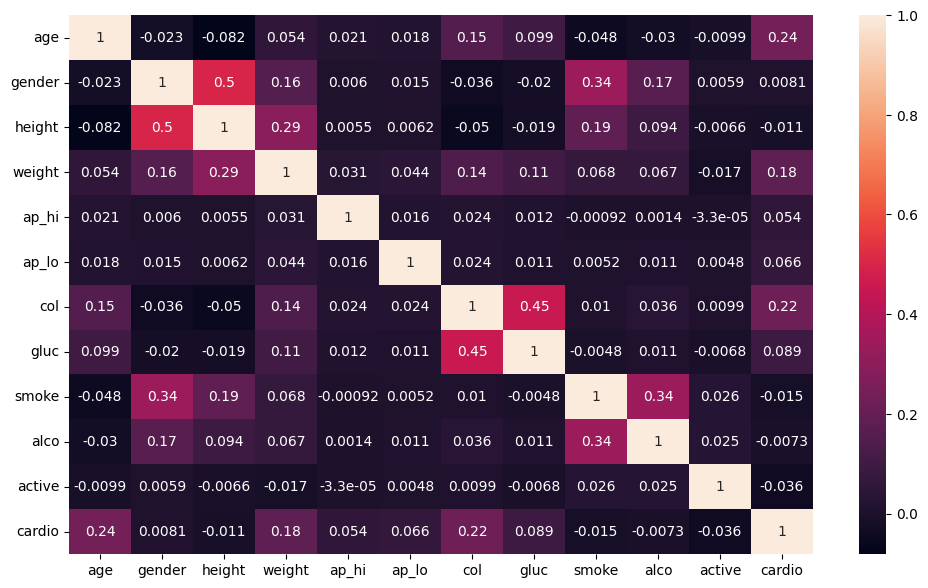

In [20]:
plt.figure(figsize = (12,7))
sns.heatmap(df2.corr(), annot=True)

<Axes: xlabel='cardio', ylabel='count'>

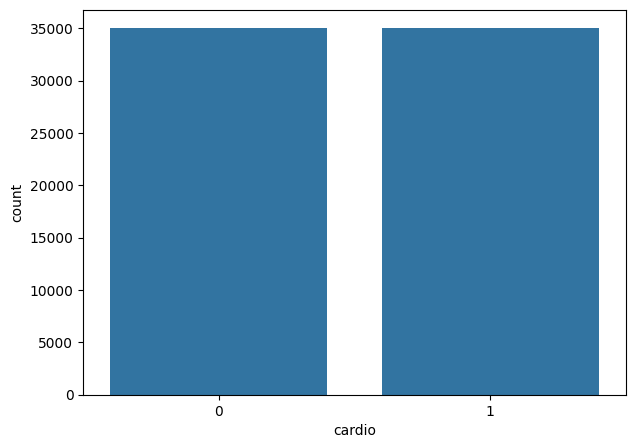

In [21]:
plt.figure(figsize = (7, 5))
sns.countplot(x = "cardio", data = df2)

## Data Splitting

In [22]:
df2.head()

,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [24]:
x.shape

(70000, 11)

In [25]:
y.shape

(70000,)

## Feature Scaling

In [26]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [27]:
x

array([[-0.43606151,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.30768633, -0.73310834, -1.01816804, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.24799666, -0.73310834,  0.07804703, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.16328642,  1.36405487,  2.27047718, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.20058905, -0.73310834, -0.16555632, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.43414373, -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711]])

## Data Training

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

# Model Development

## 1. Logistic Regression Model

In [29]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      9591
           1       0.66      0.74      0.70      7909

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.72      0.71      0.71     17500



In [30]:
lr_pred[:200]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0])

In [31]:
y_test.values[:200]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0])

## 2. Support Vector Machine (SVM) Model

In [32]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      9383
           1       0.68      0.75      0.71      8117

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500



## 3. Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier 

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      9012
           1       0.70      0.73      0.71      8488

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



# MODEL TESTING / VALIDATION

In [35]:
df2[df2["cardio"]==1]

,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
15,16782,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [36]:
lr_model.predict([[20228, 1, 156, 85.0, 140, 90, 3, 1, 0, 0, 1]])

array([1])

In [37]:
lr_model.predict([[19066, 2, 183, 105.0, 180, 90, 3, 1, 0, 1, 0]])

array([1])

In [38]:
lr_model.predict([[22431, 1, 163, 72.0, 135, 80, 1, 2, 0, 0, 0]])

array([1])

In [39]:
df2[df2["cardio"]==0]

,age,gender,height,weight,ap_hi,ap_lo,col,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69987,18852,1,151,49.0,120,80,1,1,0,0,1,0
69988,21978,1,160,59.0,110,70,1,1,0,0,1,0
69991,20609,1,159,72.0,130,90,2,2,0,0,1,0
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0


In [40]:
lr_model.predict([[18393, 2, 168, 62.0, 110, 80, 1, 1, 0, 0, 1]])

array([1])

In [41]:
lr_model.predict([[20540, 1, 170, 72.0, 120, 80, 2, 1, 0, 0, 1]])

array([1])

In [42]:
# Above Model Testing and Validation uses the samples of real data on a real case scenerio to test or validate 
# the trained lr_model if the person has a cadio diseases or not. testing with the associates parameters(data)